In [148]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time
import tracemalloc
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import math

In [33]:
df = pd.read_csv('vgsales.csv')
df.sample(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12567,12569,Oddworld: Munch's Oddysee,GBA,2003.0,Platform,THQ,0.04,0.02,0.00,0.00,0.06
2716,2718,FIFA 15,Wii,2014.0,Sports,Electronic Arts,0.24,0.46,0.00,0.06,0.76
6363,6365,Jikkyou Powerful Pro Yakyuu 2,SNES,1995.0,Sports,Konami Digital Entertainment,0.00,0.00,0.27,0.00,0.27
12395,12397,Championship Surfer,PS,2000.0,Sports,Mattel Interactive,0.03,0.02,0.00,0.00,0.06
2001,2003,Bomberman 64,N64,1997.0,Puzzle,Hudson Soft,0.50,0.20,0.31,0.03,1.04
1999,2001,Brink,X360,2011.0,Shooter,Bethesda Softworks,0.59,0.35,0.01,0.09,1.04
4776,4778,My Virtual Tutor: Reading Adventure First to S...,DS,2009.0,Misc,Mentor Interactive,0.38,0.00,0.00,0.03,0.41
7975,7977,Dance Central: Spotlight,XOne,2014.0,Misc,Microsoft Game Studios,0.15,0.03,0.00,0.00,0.19
15917,15920,Violet no Atelier: Gramnad no Renkinjutsushi 2...,PSP,2011.0,Role-Playing,Gust,0.00,0.00,0.02,0.00,0.02
16282,16285,Kamaitachi no Yoru 2: Tokubetsu Hen,PSP,2006.0,Adventure,ChunSoft,0.00,0.00,0.01,0.00,0.01


In [66]:
df = pd.read_csv('vgsales.csv')
df = df.drop(columns=['Rank', 'Name'])
df.fillna(df.mode().iloc[0], inplace=True)

le = LabelEncoder()
categorical_columns = ["Platform", "Genre", "Publisher"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
target_column = "Global_Sales"
numeric_columns = [col for col in df.columns if col != target_column]

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.sample(15)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16450,0.566667,0.775,0.000000,0.627383,0.000000,0.000345,0.000000,0.000000,0.01
5395,0.000000,0.050,0.000000,0.003466,0.007713,0.000689,0.000000,0.000000,0.34
14417,0.633333,0.700,0.000000,0.315425,0.000723,0.000000,0.000000,0.000000,0.03
1516,0.533333,0.650,0.909091,0.239168,0.025789,0.001378,0.001957,0.016083,1.30
4938,0.866667,0.700,0.272727,0.036395,0.008677,0.000000,0.000000,0.002838,0.39
2260,0.433333,0.700,0.090909,0.909879,0.000241,0.028601,0.000000,0.007569,0.92
14565,0.133333,0.750,0.090909,0.601386,0.000000,0.001034,0.000000,0.000000,0.03
10325,0.500000,0.475,1.000000,0.707106,0.001446,0.001378,0.000000,0.000946,0.11
4181,0.633333,0.675,0.545455,0.772964,0.002410,0.007581,0.001957,0.011353,0.47
10996,0.233333,0.550,0.545455,0.417678,0.001687,0.000689,0.000000,0.000000,0.09


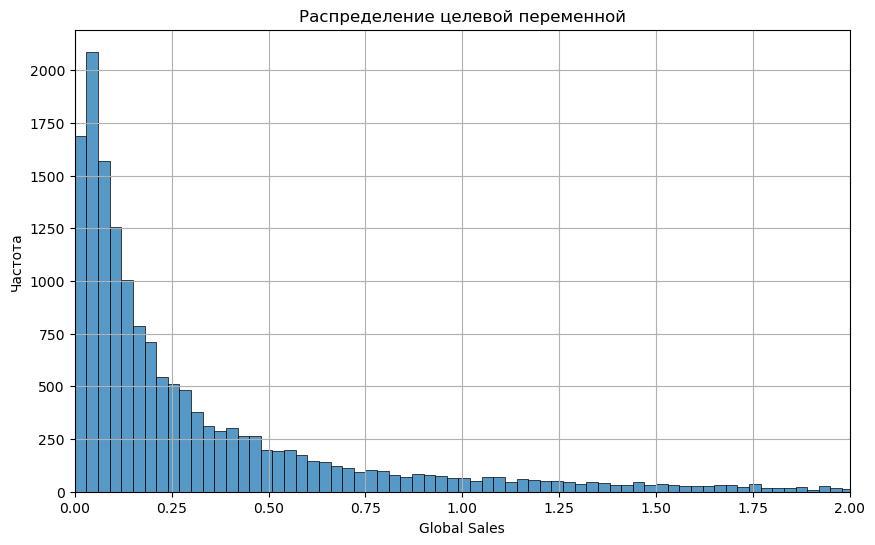

In [146]:

plt.figure(figsize=(10, 6))
sns.histplot(df[target_column], bins=np.arange(0, 3.1, 0.03))

plt.xlim(0, 2)
plt.xlabel("Global Sales")
plt.ylabel("Частота")
plt.title("Распределение целевой переменной")
plt.grid(True)

plt.show()

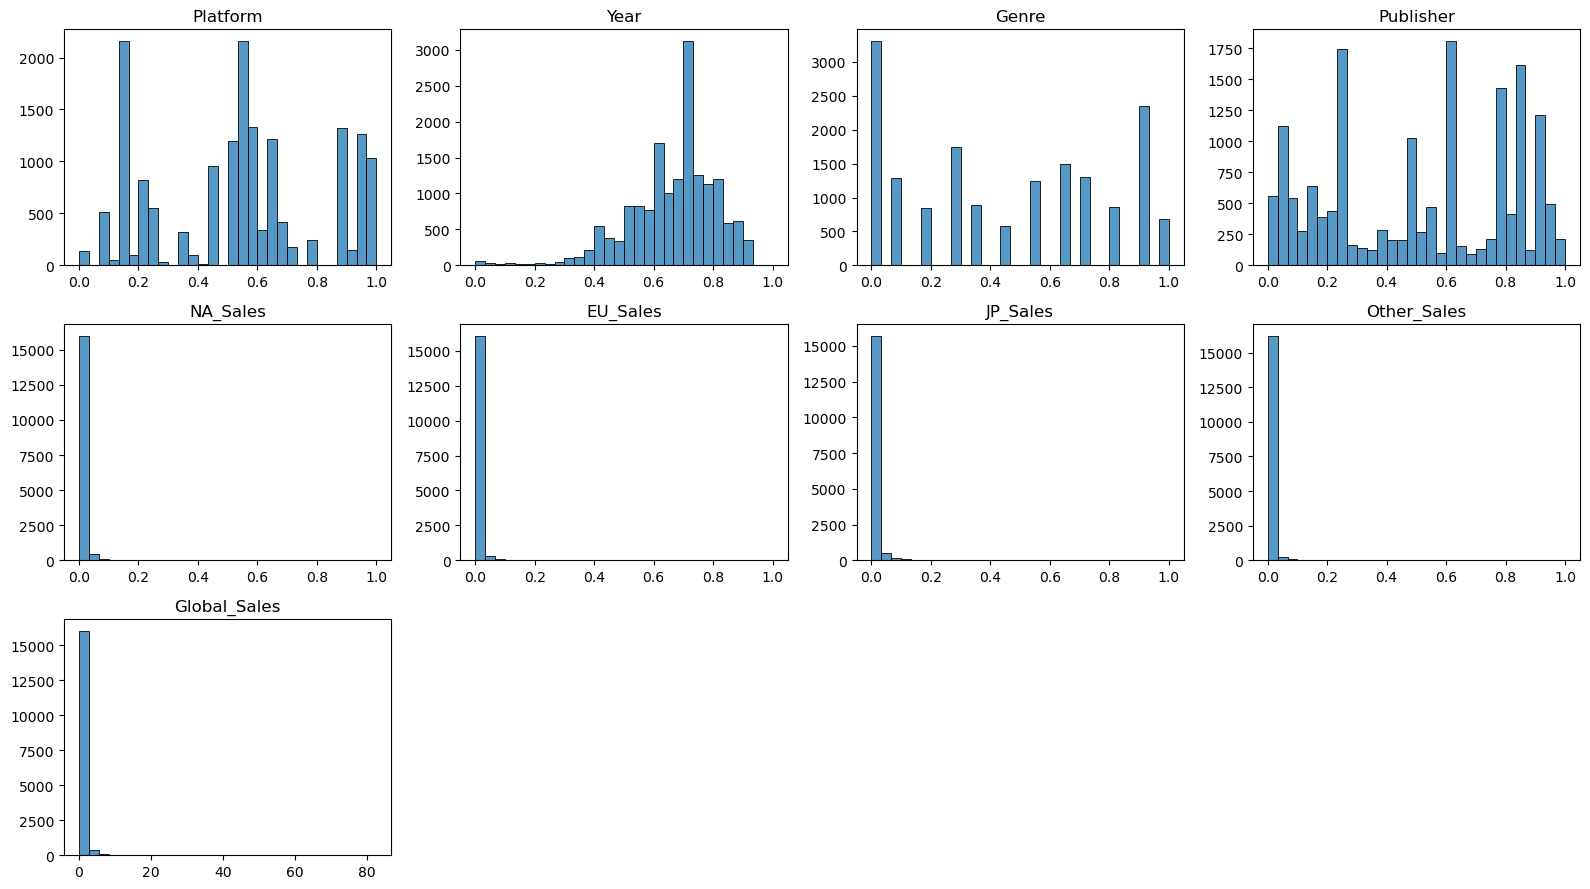

In [149]:
num_columns = len(df.columns)
cols = 4 
rows = math.ceil(num_columns / cols)

plt.figure(figsize=(4 * cols, 3 * rows))

for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

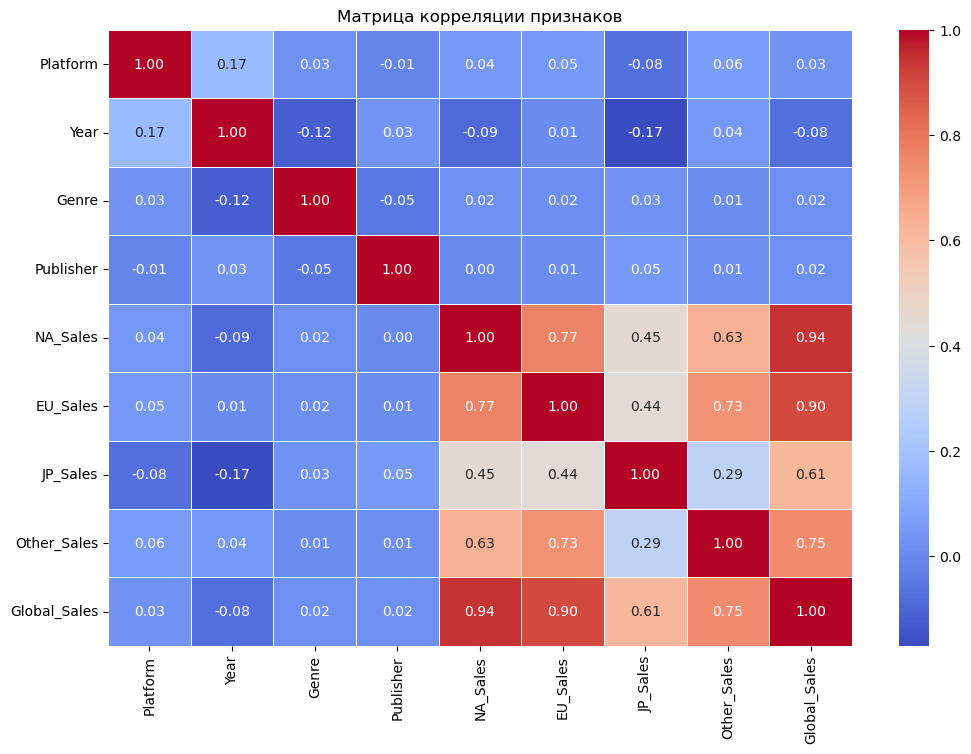

In [156]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Матрица корреляции признаков")
plt.show()

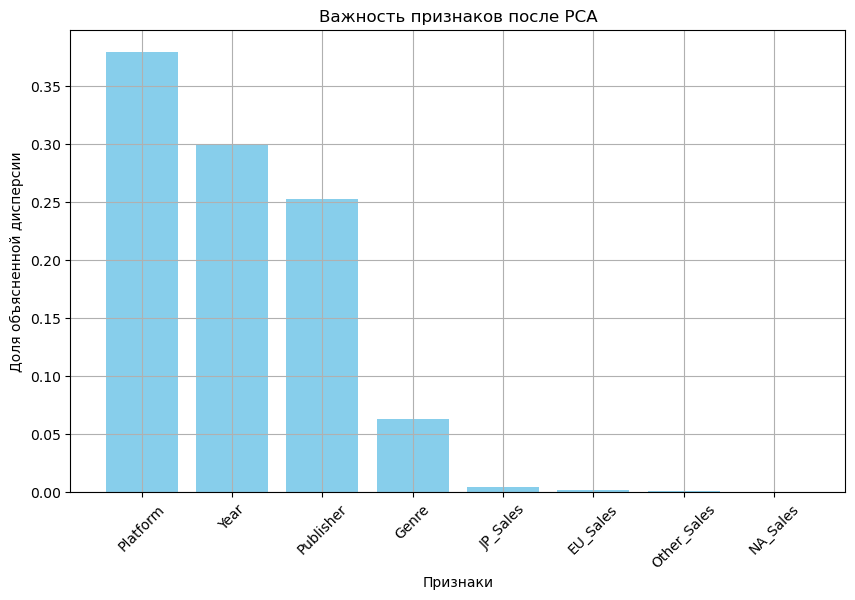

In [157]:
n_components = 8
pca = PCA(n_components=n_components) 

X_pca = pca.fit_transform(X) 
feature_importance = np.abs(pca.components_).sum(axis=0) 
feature_names = X.columns[np.argsort(feature_importance)[-n_components:]]

plt.figure(figsize=(10, 6)) 
plt.bar(feature_names, pca.explained_variance_ratio_, color='skyblue') 
plt.xlabel("Признаки") 
plt.ylabel("Доля объясненной дисперсии") 
plt.title("Важность признаков") 
plt.xticks(rotation=45) 
plt.grid() 
plt.show()

# Линейная регрессия

In [126]:
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)



model = LinearRegression()

tracemalloc.start()
start_time = time.time()

model.fit(X_train, y_train)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

end_time = time.time()
execution_time = end_time - start_time



y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.10f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.10f}")
print(f"Коэффициент детерминации (R²): {r2:.10f}")
print(f"Время выполнения: {execution_time:.6f} секунд")
print(f"Использование памяти: {current / 1024:.2f} KB (пиковое: {peak / 1024:.2f} KB)")


Среднеквадратичная ошибка (MSE): 0.0000268565
Средняя абсолютная ошибка (MAE): 0.0028868590
Коэффициент детерминации (R²): 0.9999877392
Время выполнения: 0.012550 секунд
Использование памяти: 6.33 KB (пиковое: 2118.18 KB)


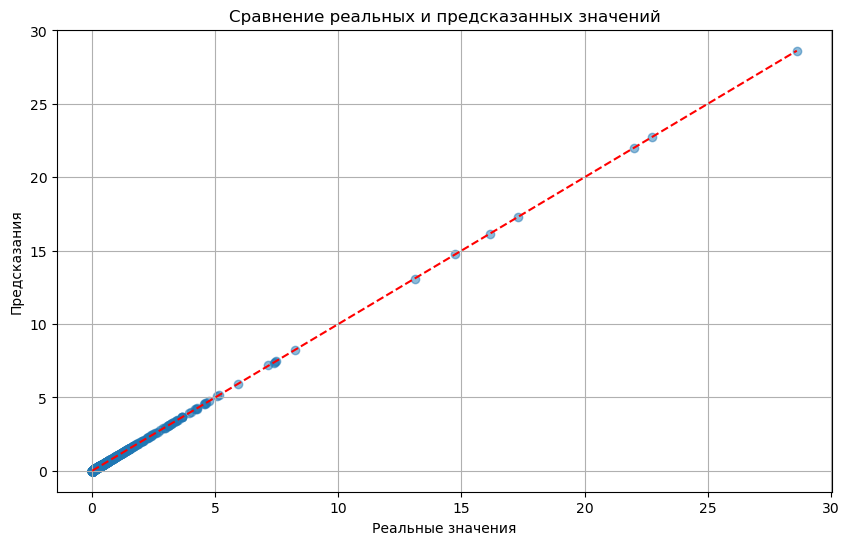

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказания")
plt.title("Сравнение реальных и предсказанных значений")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Линия идеального предсказания
plt.grid()
plt.show()

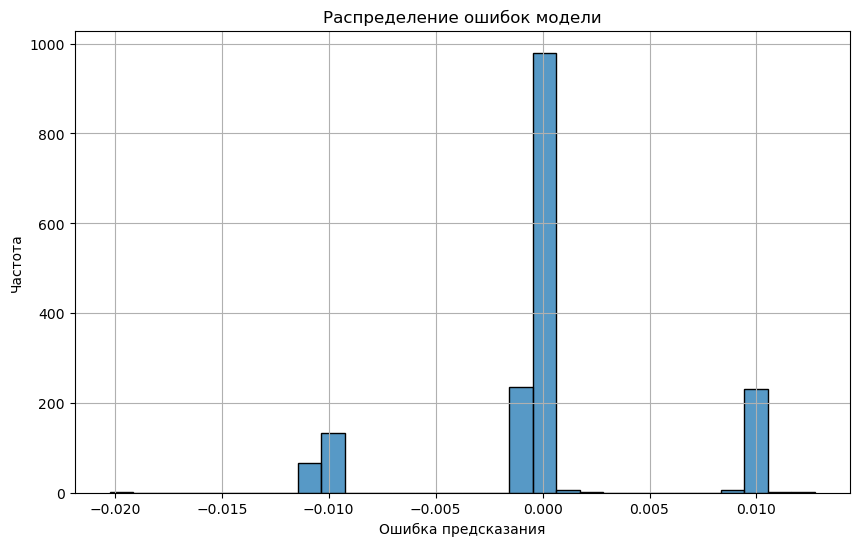

In [130]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30)
plt.xlabel("Ошибка предсказания")
plt.ylabel("Частота")
plt.title("Распределение ошибок модели")
plt.grid()
plt.show()

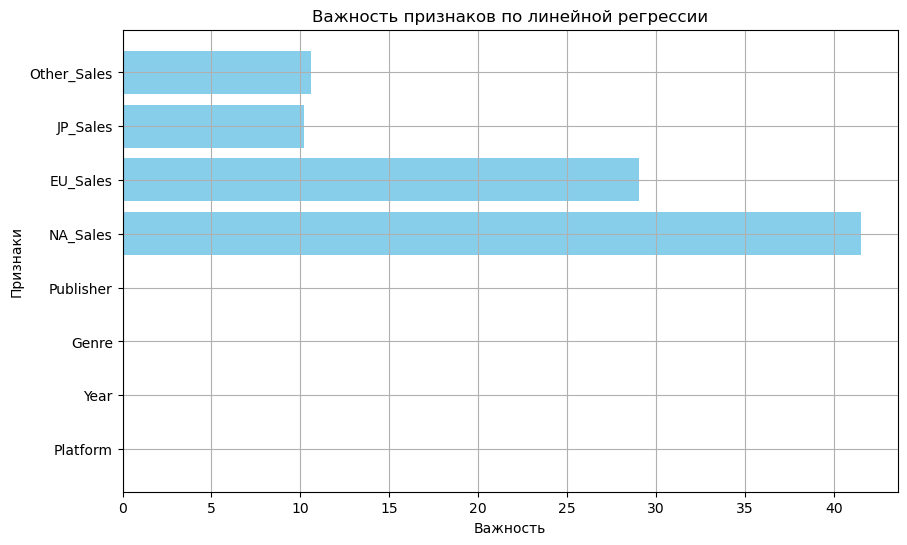

[2.63429414e-04 1.38055705e-04 5.50169441e-06 4.23511997e-04
 4.14862101e+01 2.90208772e+01 1.02179235e+01 1.05661097e+01]


In [136]:
feature_importance = np.abs(model.coef_)
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')

plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.title("Важность признаков по линейной регрессии")
plt.grid()
plt.show()
print(feature_importance)

# Дерево решений 

In [139]:
model = DecisionTreeRegressor()

tracemalloc.start()
start_time = time.time()

model.fit(X_train, y_train)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

end_time = time.time()
execution_time = end_time - start_time

y_pred = model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred)
mae_tree = mean_absolute_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse_tree:.10f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_tree:.10f}")
print(f"Коэффициент детерминации (R²): {r2_tree:.10f}")
print(f"Время выполнения: {execution_time:.6f} секунд")
print(f"Использование памяти: {current / 1024:.2f} KB (пиковое: {peak / 1024:.2f} KB)")

Среднеквадратичная ошибка (MSE): 0.0605617286
Средняя абсолютная ошибка (MAE): 0.0367058233
Коэффициент детерминации (R²): 0.9723518560
Время выполнения: 0.073512 секунд
Использование памяти: 147.75 KB (пиковое: 1549.16 KB)


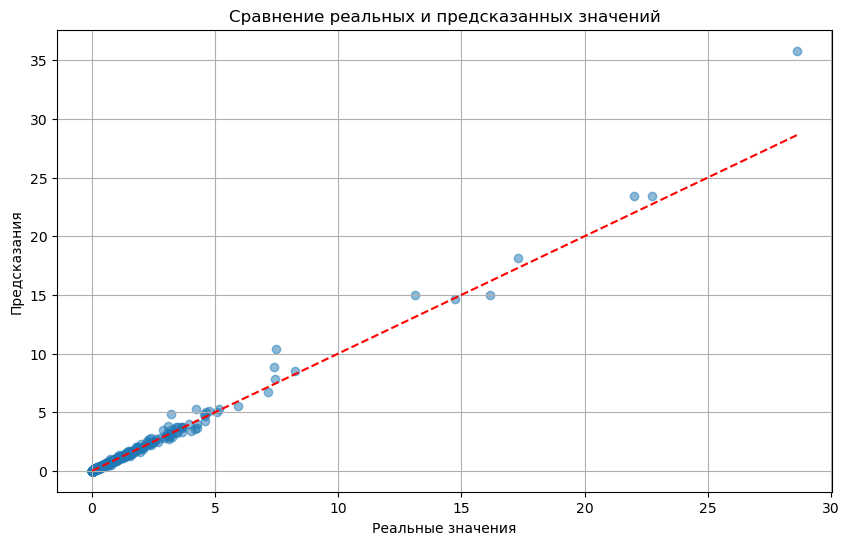

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказания")
plt.title("Сравнение реальных и предсказанных значений")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Линия идеального предсказания
plt.grid()
plt.show()

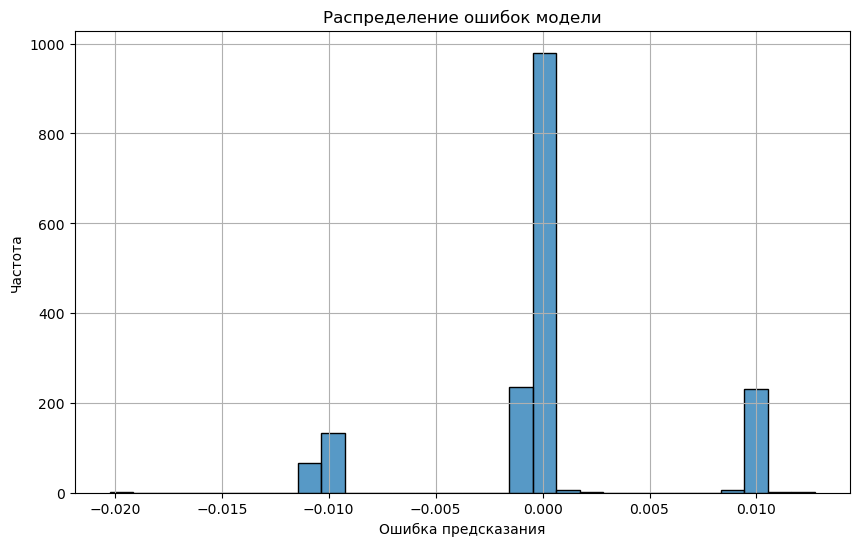

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30)
plt.xlabel("Ошибка предсказания")
plt.ylabel("Частота")
plt.title("Распределение ошибок модели")
plt.grid()
plt.show()

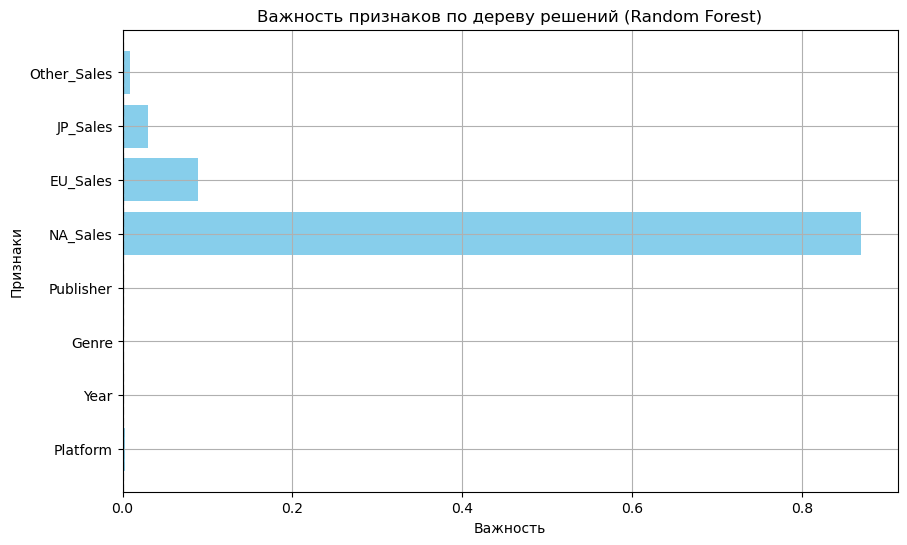

In [141]:
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.title("Важность признаков по дереву решений")
plt.axvline(0, color='black', linestyle='--')
plt.grid()
plt.show()

# Градиентный бустинг

In [143]:
model = GradientBoostingRegressor()

tracemalloc.start()
start_time = time.time()

model.fit(X_train, y_train)

current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

end_time = time.time()
execution_time = end_time - start_time

y_pred = model.predict(X_test)

mse_boost = mean_squared_error(y_test, y_pred)
mae_boost = mean_absolute_error(y_test, y_pred)
r2_boost = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse_boost:.10f}")
print(f"Средняя абсолютная ошибка (MAE): {mae_boost:.10f}")
print(f"Коэффициент детерминации (R²): {r2_boost:.10f}")
print(f"Время выполнения: {execution_time:.6f} секунд")
print(f"Использование памяти: {current / 1024:.2f} KB (пиковое: {peak / 1024:.2f} KB)")

Среднеквадратичная ошибка (MSE): 0.0093424557
Средняя абсолютная ошибка (MAE): 0.0277702051
Коэффициент детерминации (R²): 0.9957349044
Время выполнения: 1.283138 секунд
Использование памяти: 196.77 KB (пиковое: 1550.66 KB)


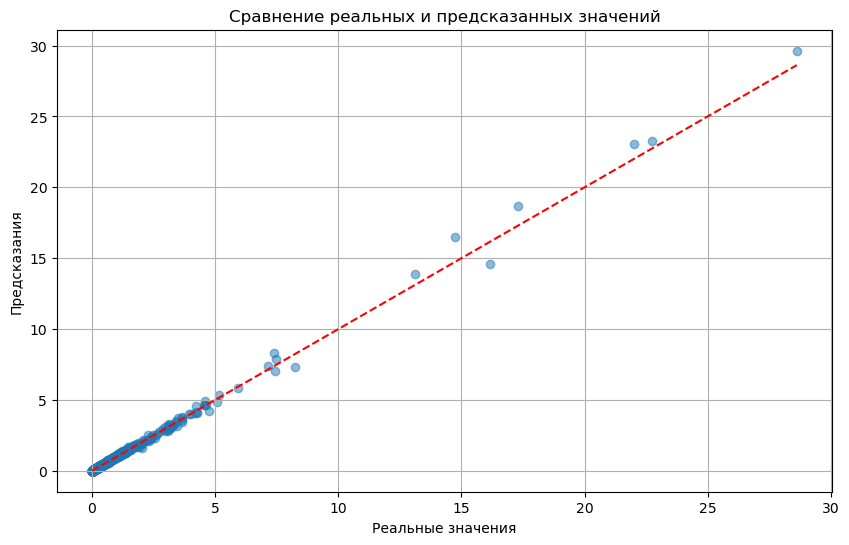

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальные значения")
plt.ylabel("Предсказания")
plt.title("Сравнение реальных и предсказанных значений")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Линия идеального предсказания
plt.grid()
plt.show()

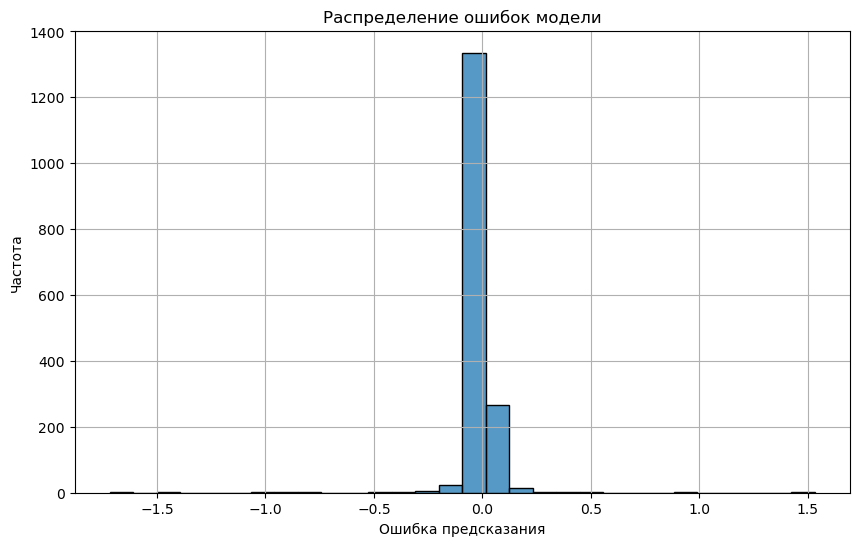

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30)
plt.xlabel("Ошибка предсказания")
plt.ylabel("Частота")
plt.title("Распределение ошибок модели")
plt.grid()
plt.show()

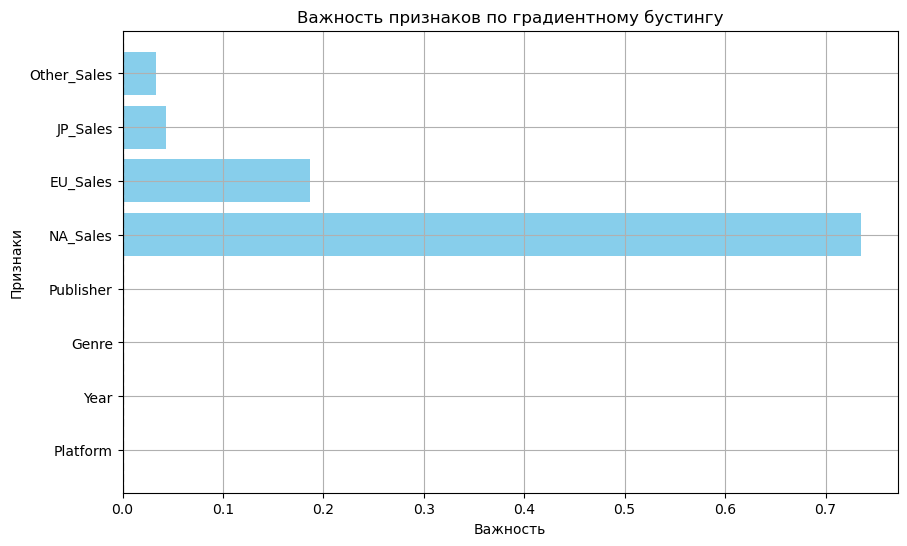

In [145]:
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color=['skyblue'])
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.title("Важность признаков по градиентному бустингу")
plt.axvline(0, color='black', linestyle='--')
plt.grid()
plt.show()

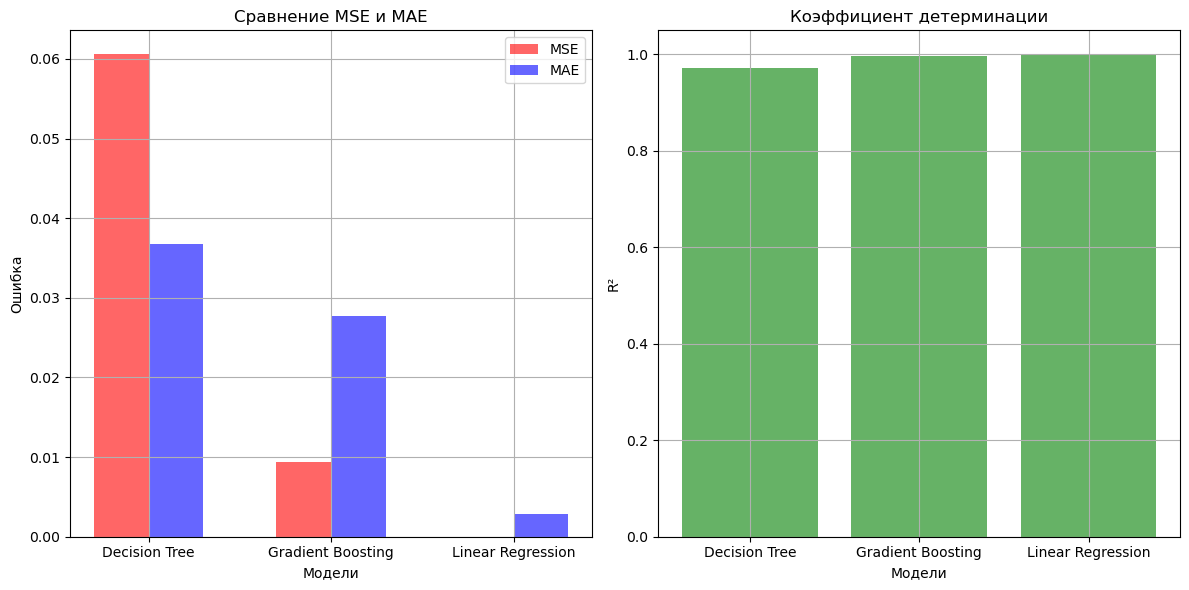

In [150]:
models = ["Decision Tree", "Gradient Boosting", "Linear Regression"]
mse_values = [mse_tree, mse_boost, mse]
mae_values = [mae_tree, mae_boost, mae] 
r2_values = [r2_tree, r2_boost, r2]
x = np.arange(len(models))
width = 0.3

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(x - width/2, mse_values, width, label="MSE", color="red", alpha=0.6)
axes[0].bar(x + width/2, mae_values, width, label="MAE", color="blue", alpha=0.6)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_xlabel("Модели")
axes[0].set_ylabel("Ошибка")
axes[0].set_title("Сравнение MSE и MAE")
axes[0].legend()
axes[0].grid(True)

axes[1].bar(models, r2_values, color="green", alpha=0.6)
axes[1].set_xlabel("Модели")
axes[1].set_ylabel("R²")
axes[1].set_title("Коэффициент детерминации")
axes[1].grid(True)

plt.tight_layout()
plt.show()
